# 記述統計

In [166]:
import pandas as pd
import japanize_matplotlib
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pipe
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score


importlib.reload(pipe)
from pipe.baseline import Baseline


pd.options.display.max_columns = None

In [167]:
df_train = pd.read_csv("../data/train.csv")
df_train_copy = df_train.copy()

df_train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.0,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1013.075833,32.701667,750.754157,10.218387,2.853333,2.655833,66.261667,2.716667,2.125833,2.717500,7052.521667,2.614167,15.115000,3.11000,2.616667,80.0,0.863333,10.631667,2.755000,2.70000,6.351667,4.249167,2.163333,3.780000,0.177500
std,575.726036,8.282199,415.420917,8.134144,1.060390,1.139502,20.257801,0.675847,1.185821,1.091797,5033.677026,2.460422,3.632415,0.31302,1.066460,0.0,0.874810,7.721335,1.256167,0.70267,5.120532,3.688507,3.312219,3.314225,0.382251
min,0.000000,17.000000,59.231581,-0.023999,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1052.000000,0.000000,11.000000,3.00000,1.000000,80.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,508.750000,26.000000,403.946043,2.688173,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3537.000000,1.000000,12.000000,3.00000,2.000000,80.0,0.000000,5.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,1018.000000,34.000000,736.873463,9.345924,3.000000,3.000000,67.000000,3.000000,2.000000,3.000000,5071.000000,1.000000,14.000000,3.00000,3.000000,80.0,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1519.250000,37.000000,1092.443495,15.231438,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8715.250000,4.000000,18.000000,3.00000,3.250000,80.0,1.000000,15.000000,3.000000,3.00000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1998.000000,56.000000,1484.979305,29.890208,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19833.000000,9.000000,25.000000,4.00000,4.000000,80.0,3.000000,36.000000,6.000000,4.00000,32.000000,17.000000,15.000000,17.000000,1.000000


## 一旦全部の特徴量をぶっ込んでみる

In [168]:
# df_train_dummies = pd.get_dummies(
#     df_train,
#     columns=[
#         "BusinessTravel",
#         "Department",
#         "EducationField",
#         "Gender",
#         "JobRole",
#         "MaritalStatus",
# "OverTime",
# "Over18",
#     ],
# )

# カテゴリ変数を全て削除
df_train_dummies = df_train.drop(
    columns=[
        # "EmployeeNumber",
        # "EmployeeCount",
        "StandardHours",
        "StockOptionLevel",
        "TrainingTimesLastYear",
        "EducationField",
        "MaritalStatus",
        "JobRole",
        "OverTime",
        "Over18",
        "Gender",
        "Department",
        "BusinessTravel",
    ]
)

df_train_dummies.head()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,26,450.941476,7.601074,3,4,43,2,1,2,16307,1,13,3,3,1,2,11,8,7,0,0
1,3,47,730.235896,26.739489,3,2,98,2,1,1,9526,8,11,3,3,20,1,5,9,4,4,0
2,7,26,1082.560066,7.374739,3,2,84,2,1,2,10596,8,18,3,2,4,3,3,2,0,2,0
3,10,46,706.247579,14.791373,1,1,79,2,1,3,5762,0,20,4,4,6,1,5,4,7,7,1
4,11,25,500.610860,2.146966,4,2,98,3,2,3,17068,6,14,3,2,8,3,1,0,0,0,0


In [169]:
X = df_train_dummies.drop(["Attrition", "id"], axis=1)
y = df_train_dummies["Attrition"]
id = df_train_dummies["id"]

print(X.shape)
print(y.shape)

(1200, 20)
(1200,)


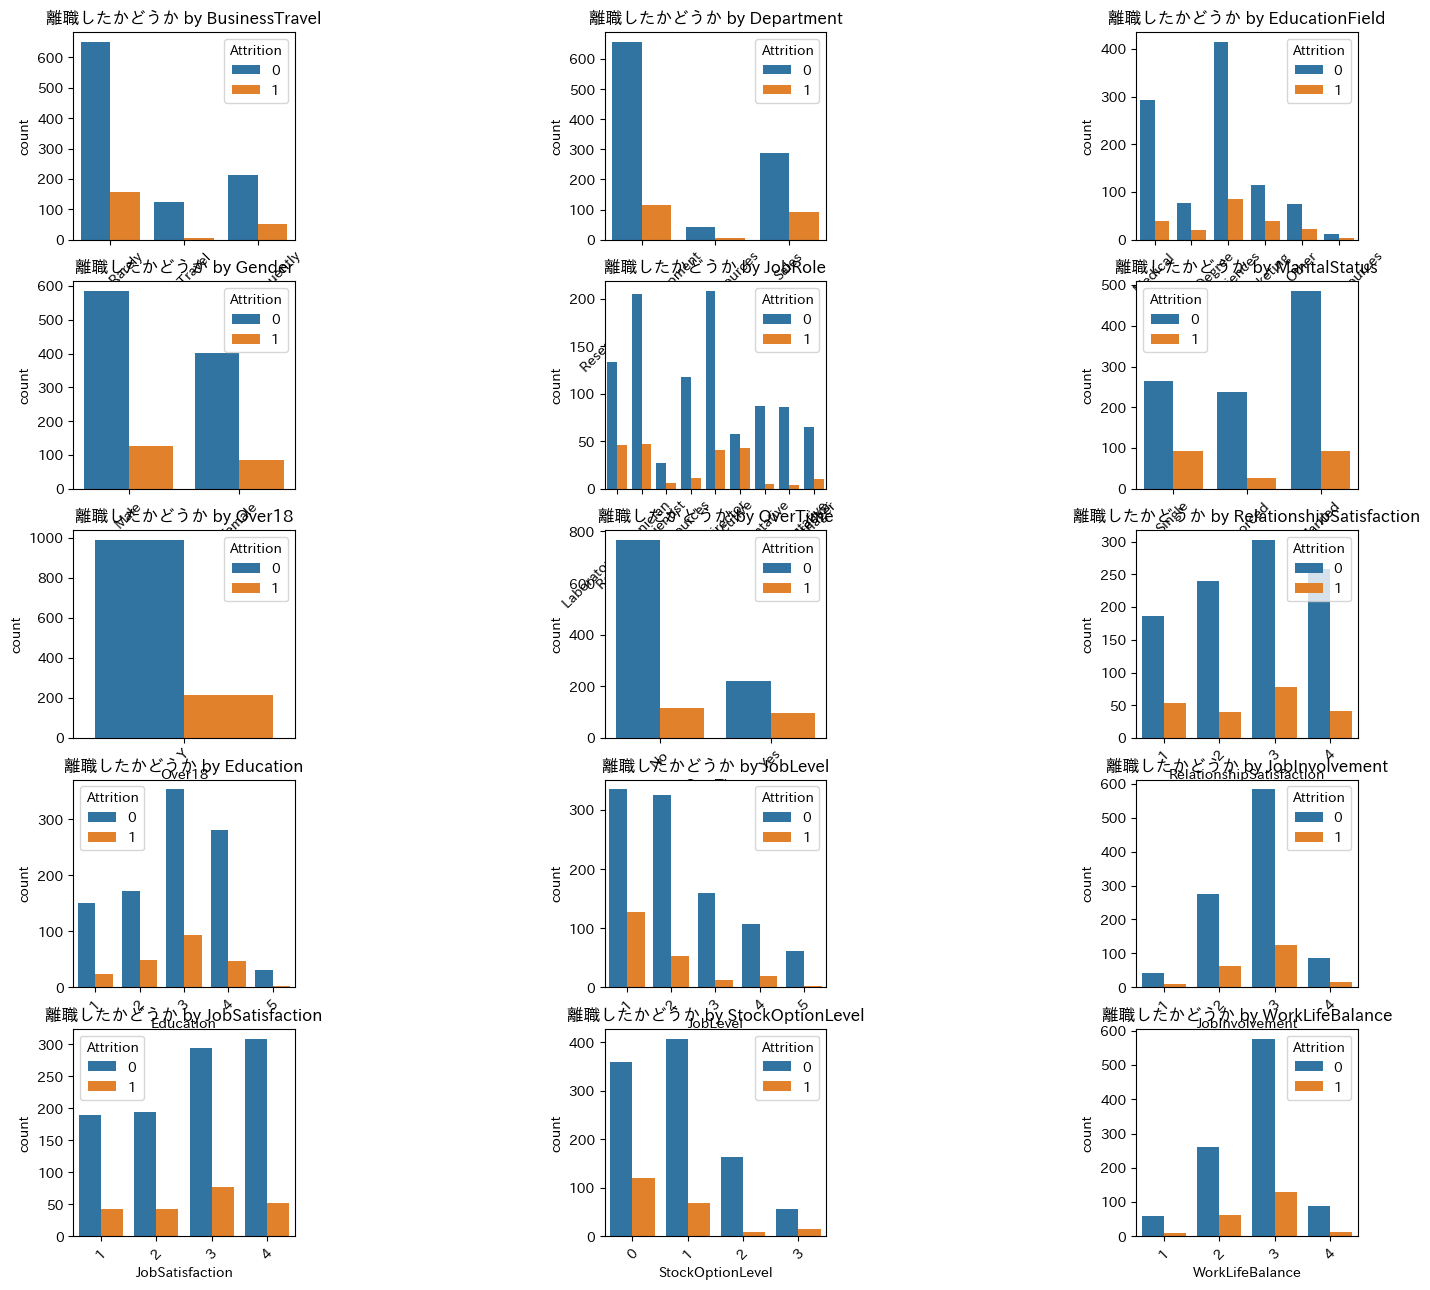

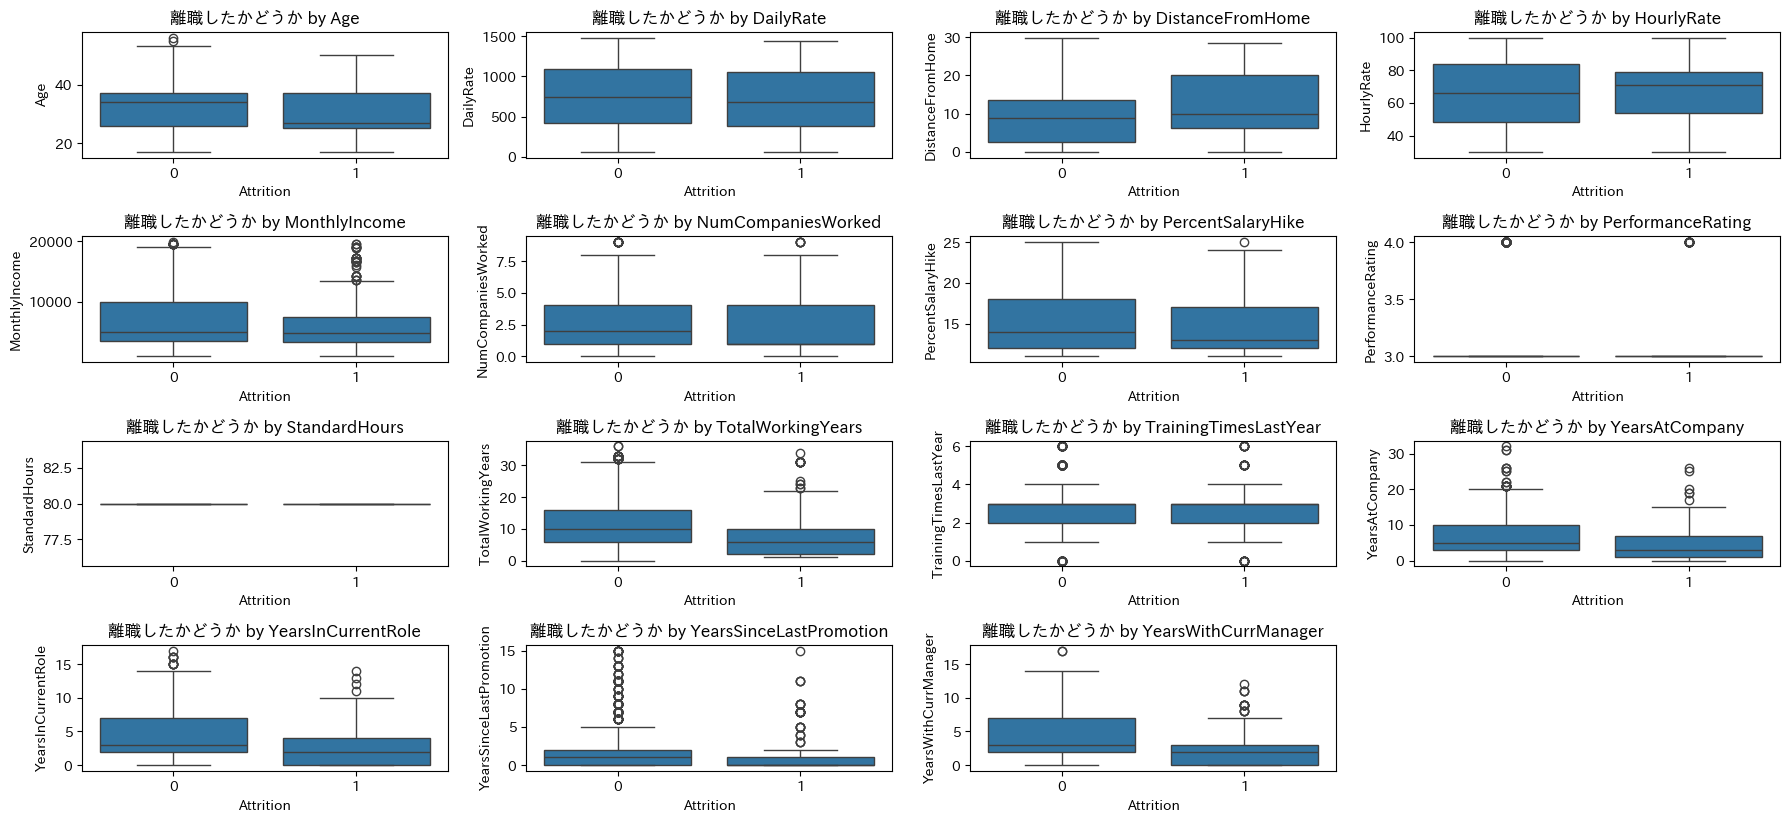

In [203]:
# カテゴリカル変数と数値変数のリスト
categorical_features = [
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "Over18",
    "OverTime",
    "RelationshipSatisfaction",
    "Education",
    "JobLevel",
    "JobInvolvement",
    "JobSatisfaction",
    "StockOptionLevel",
    "WorkLifeBalance",
]

numerical_features = [
    "Age",
    "DailyRate",
    "DistanceFromHome",
    "HourlyRate",
    "MonthlyIncome",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "PerformanceRating",
    "StandardHours",
    "TotalWorkingYears",
    "TrainingTimesLastYear",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
]

# プロットの作成
plt.figure(figsize=(20, 48))
for i, feature in enumerate(categorical_features):
    # 棒グラフ
    plt.subplot(len(categorical_features), 6, 2 * i + 1)
    sns.countplot(x=feature, hue="Attrition", data=df_train)
    plt.title(f"離職したかどうか by {feature}")
    plt.xticks(rotation=45)

    # EducationFieldのカテゴリごとのデータ数をカウント
    education_field_counts = df_train[feature].value_counts()

    # 円グラフの作成
    # plt.subplot(len(categorical_features), 2, 2 * i + 2)
    # plt.pie(
    #     education_field_counts,
    #     labels=education_field_counts.index,
    #     autopct="%1.1f%%",
    #     startangle=90,
    # )
    # plt.title(f"{feature} カテゴリごとのデータ数")

# プロット間のスペースを調整
# plt.subplots_adjust(hspace=0.5, wspace=0.3)

# plt.tight_layout()
# plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()


# 数値変数のプロット
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(6, 4, i)
    sns.boxplot(x="Attrition", y=feature, data=df_train)
    plt.title(f"離職したかどうか by {feature}")
plt.tight_layout()
plt.show()

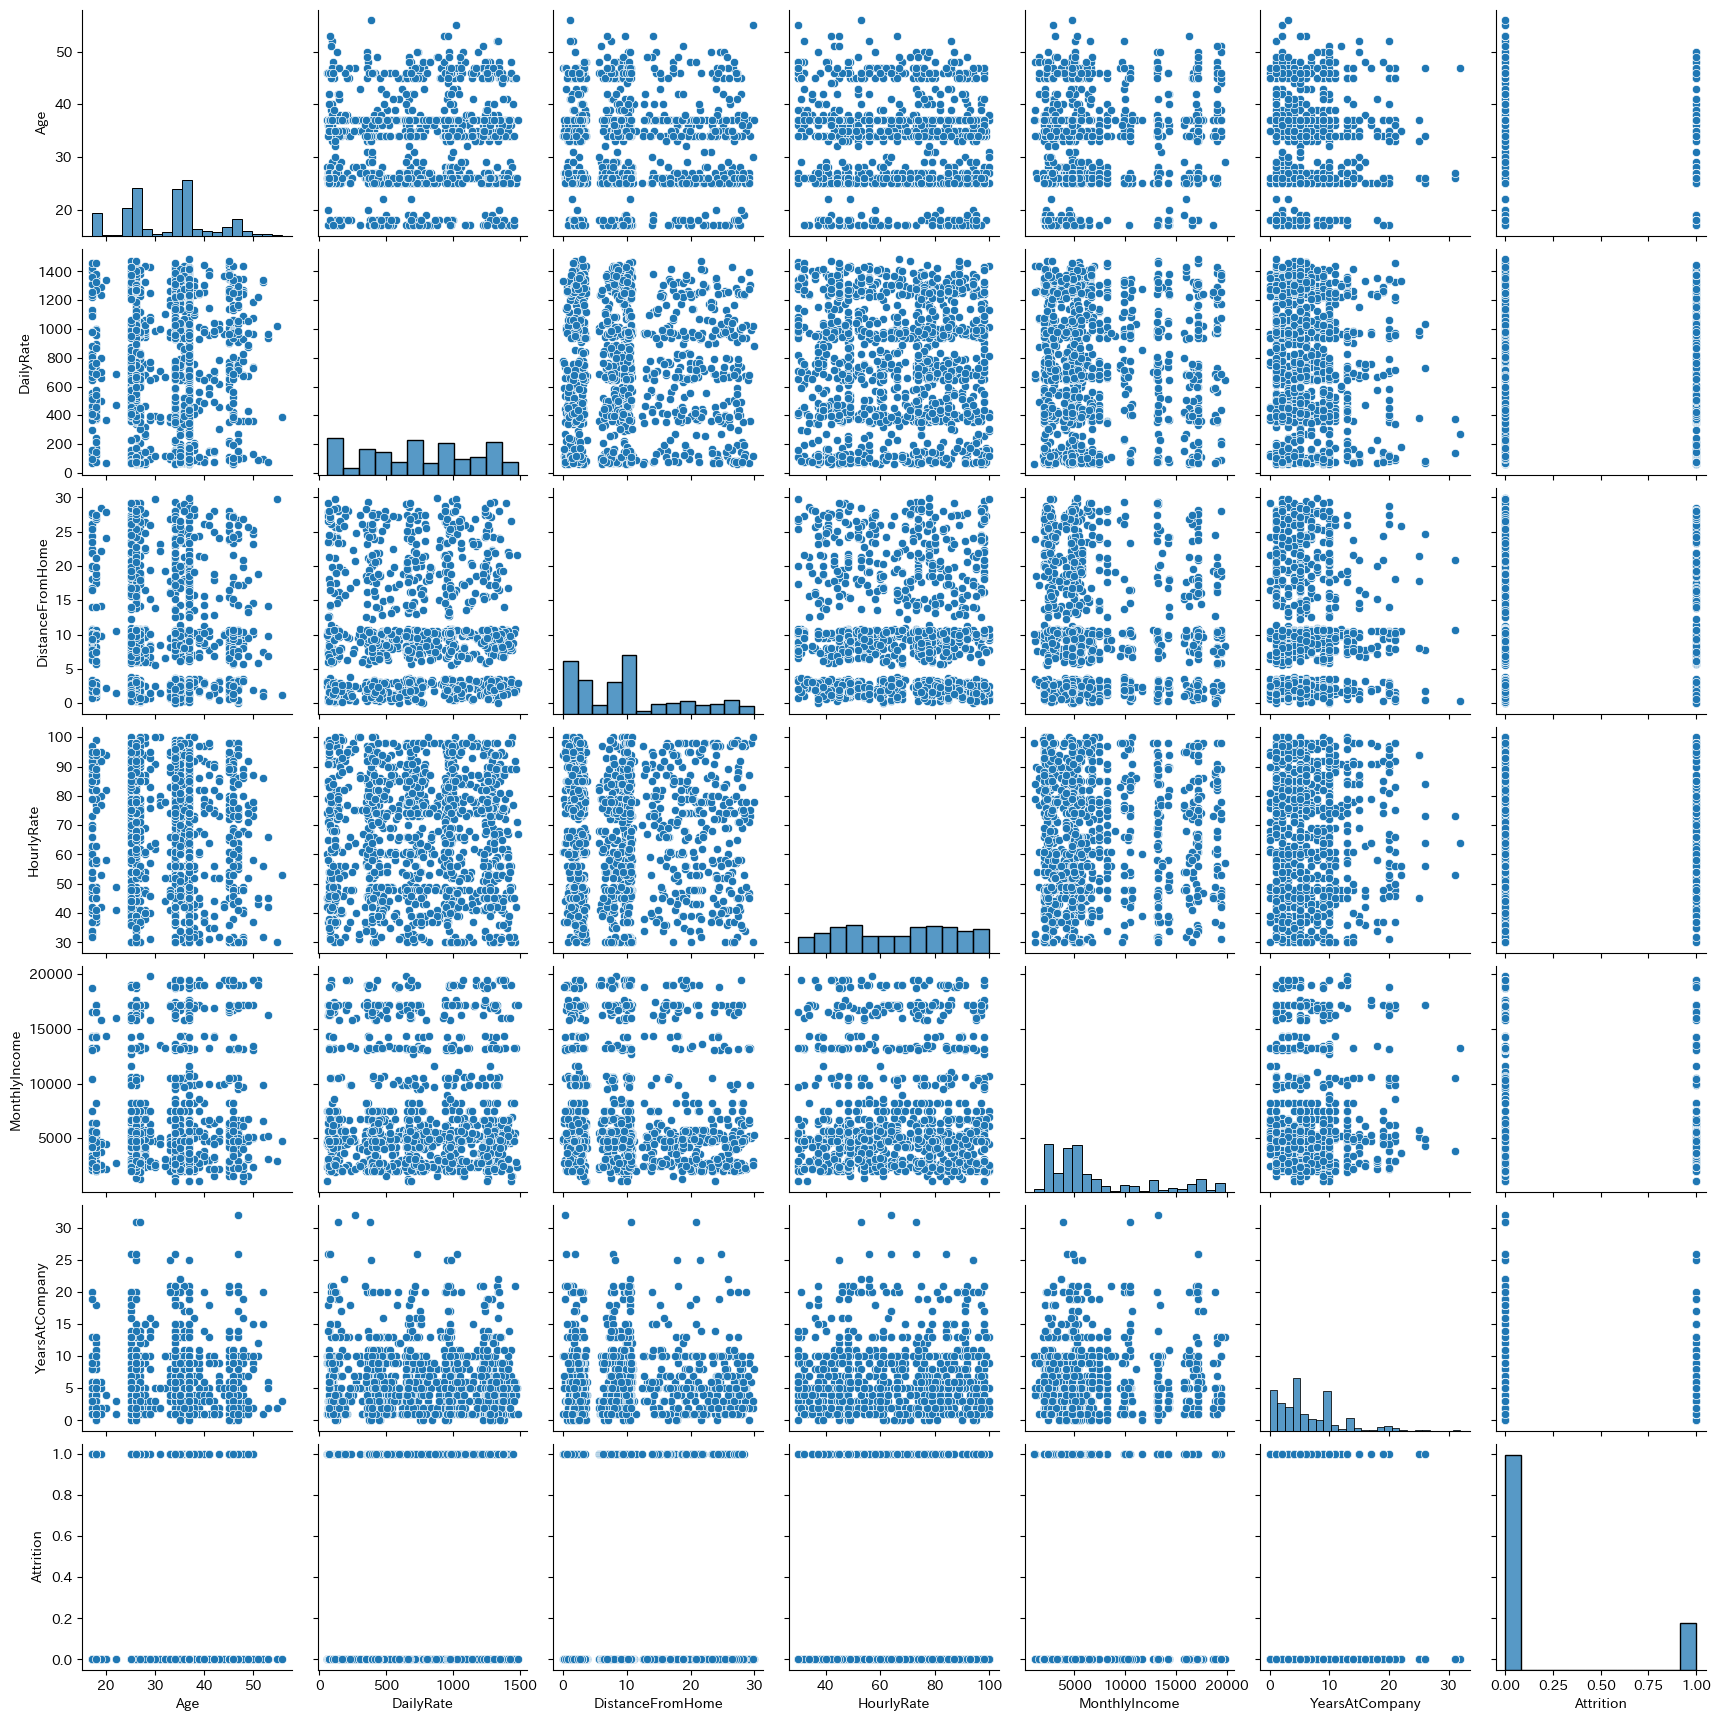

In [171]:
sns.pairplot(
    df_train[
        [
            "Age",
            "DailyRate",
            "DistanceFromHome",
            "HourlyRate",
            "MonthlyIncome",
            "YearsAtCompany",
            "Attrition",
        ]
    ]
)
plt.show()

In [172]:
# # カテゴリ変数を抽出
# categorical_vars = [
#     "BusinessTravel",
#     "Department",
#     "EducationField",
#     "Gender",
#     "JobRole",
#     "MaritalStatus",
#     "OverTime",
# ]

# # すべてのカテゴリ変数のペアでヒートマップをプロット
# for i in range(len(categorical_vars)):
#     for j in range(i + 1, len(categorical_vars)):
#         var1 = categorical_vars[i]
#         var2 = categorical_vars[j]
#         cross_tab = pd.crosstab(df_train[var1], df_train[var2])

#         plt.figure(figsize=(10, 6))
#         sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues")
#         plt.title(f"{var1} vs {var2}")
#         plt.xlabel(var2)
#         plt.ylabel(var1)
#         plt.show()

/var/folders/1w/52jfb36j6sg557p8z_gknglh0000gn/T/ipykernel_92406/2554224420.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df_train.groupby("binned")["Attrition"].mean().reset_index()
/var/folders/1w/52jfb36j6sg557p8z_gknglh0000gn/T/ipykernel_92406/2554224420.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df_train.groupby("binned")["Attrition"].mean().reset_index()
/var/folders/1w/52jfb36j6sg557p8z_gknglh0000gn/T/ipykernel_92406/2554224420.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass ob

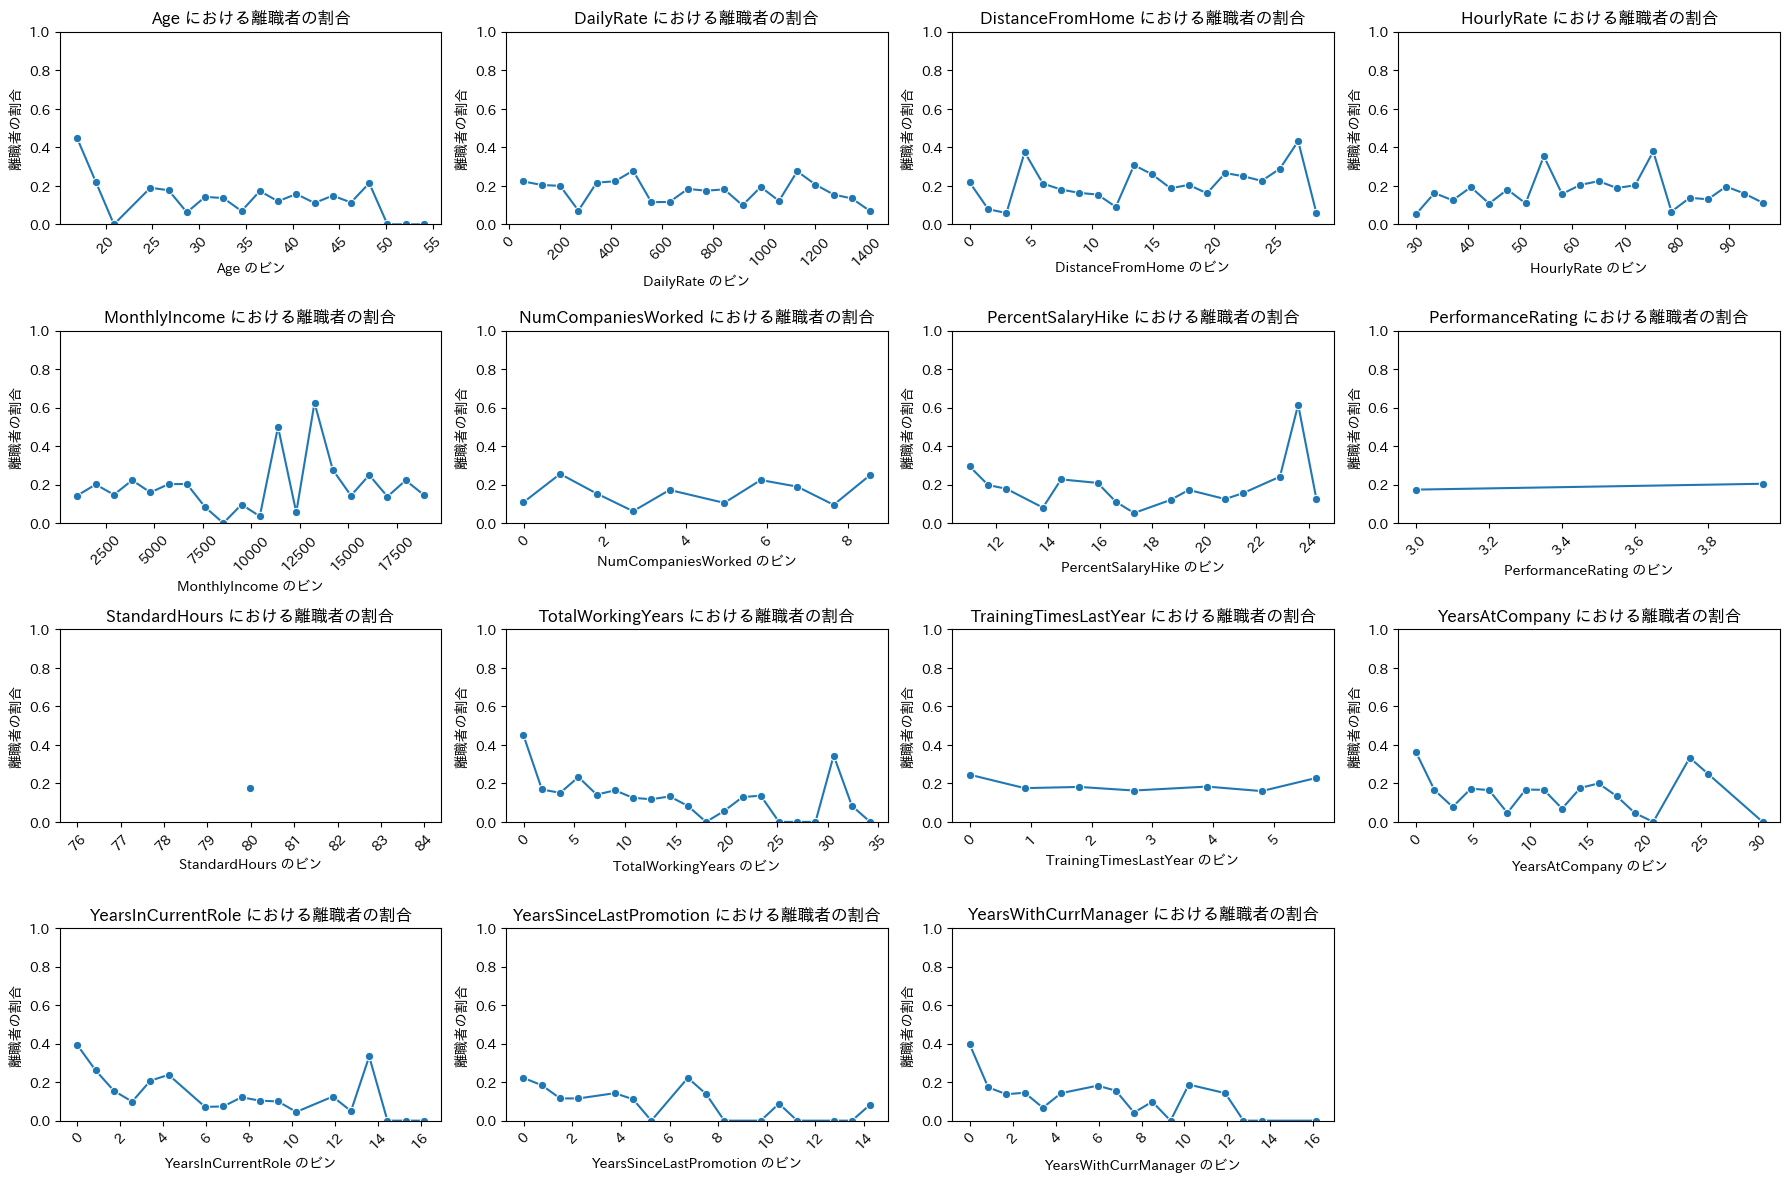

In [173]:
# ビンの数
bins = 20

plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_features, start=1):
    # 数値変数をビンに分割
    df_train["binned"] = pd.cut(df_train[feature], bins)

    # 各ビンごとのデータ
    binned_data = df_train.groupby("binned")["Attrition"].mean().reset_index()

    # ビンの境界値を数値に変換
    binned_data["binned"] = binned_data["binned"].apply(lambda x: x.left)

    # 離職者の割合をプロット
    plt.subplot(4, 4, i)
    plt.ylim(0, 1)
    sns.lineplot(x=binned_data["binned"], y=binned_data["Attrition"], marker="o")
    plt.title(f"{feature} における離職者の割合")
    plt.xlabel(f"{feature} のビン")
    plt.ylabel("離職者の割合")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 離職者数が極端に減る部分を閾値として数値変数を二値にすると精度向上につながる

In [174]:
# # 年数をビンに分ける
# bins = [0, 1, 2, 3, 10] # ビンの境界（ここでは例として5つのビンを使用）
# bin_labels = ["0", "1", "2", "3"]
# df_train["YearsInCurrentRole_Binned"] = pd.cut(
#     df_train["YearsInCurrentRole"], bins=bins, labels=bin_labels, right=False
# )

# # ビンごとの離職者数をカウント
# attrition_count = (
#     df_train[df_train["Attrition"] == 1]["YearsInCurrentRole_Binned"]
#     .value_counts()
#     .sort_index()
# )

# # 結果をプロット
# plt.figure(figsize=(10, 6))
# attrition_count.plot(kind="bar", color="skyblue")
# plt.title("離職者のビンごとの数（YearsInCurrentRole）", fontsize=16)
# plt.xlabel("Years In Current Role", fontsize=14)
# plt.ylabel("離職者数", fontsize=14)
# plt.xticks(rotation=45)
# plt.grid(axis="y")
# plt.show()

Index(['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')


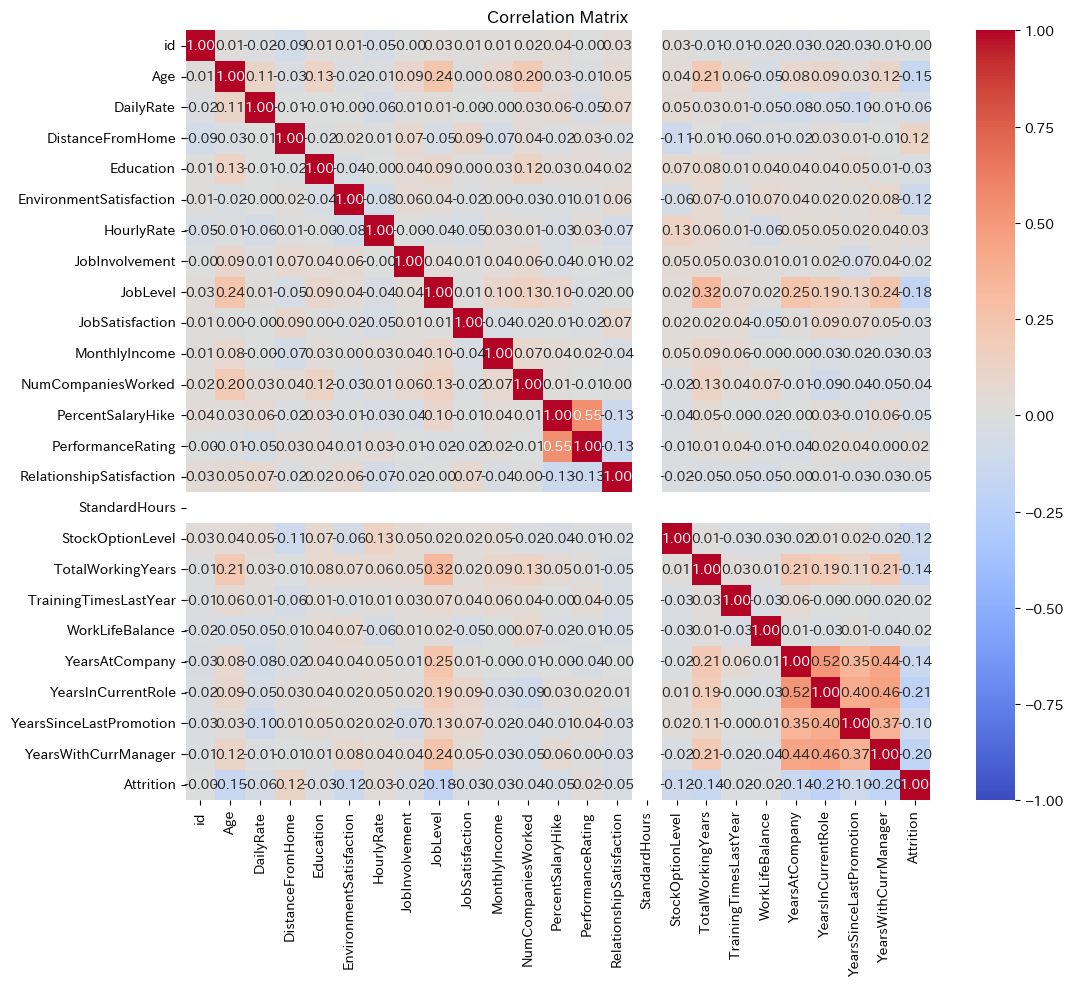

In [175]:
# 数値データのみを選択
numeric_df = df_train_copy.select_dtypes(include=["number"])

print(numeric_df.columns)

# 相関行列の計算
correlation_matrix = numeric_df.corr()

# 相関行列のプロット
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [176]:
category_df = df_train_copy.select_dtypes(exclude=["number"])

print(category_df.columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
